<a href="https://colab.research.google.com/github/AvantiShri/colab_notebooks/blob/master/modisco/MergeMotifsAcrossTFMruns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will run TF-MoDISco on two sets of sequences that produce similar motifs. We will then use TF-MoDISco's built-in merging code to collapse the sequences. This notebook was prepared by Av Shrikumar.

In [1]:
#First, download the numpy scores files (on which tfmodisco-lite will be run). These files are derived from the
# gkmexplain scores used in https://github.com/kundajelab/tfmodisco/blob/d26645/examples/H1ESC_Nanog_gkmsvm/TF%20MoDISco%20Nanog%20-%20No%20MEME%20init.ipynb
# but the sequences were split into two separate evenly-sized files to simulate the motif merging problem
!wget https://raw.githubusercontent.com/AvantiShri/model_storage/d53ee8e/modisco/gkmexplain_scores/ohe1.npz -O ohe1.npz
!wget https://raw.githubusercontent.com/AvantiShri/model_storage/d53ee8e/modisco/gkmexplain_scores/ohe2.npz -O ohe2.npz
!wget https://raw.githubusercontent.com/AvantiShri/model_storage/d53ee8e/modisco/gkmexplain_scores/hypscores1.npz -O hypscores1.npz
!wget https://raw.githubusercontent.com/AvantiShri/model_storage/d53ee8e/modisco/gkmexplain_scores/hypscores2.npz -O hypscores2.npz

--2023-05-09 10:24:35--  https://raw.githubusercontent.com/AvantiShri/model_storage/d53ee8e/modisco/gkmexplain_scores/ohe1.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 384264 (375K) [application/octet-stream]
Saving to: ‘ohe1.npz’

ohe1.npz            100%[===================>] 375.26K  --.-KB/s    in 0.04s   

2023-05-09 10:24:35 (9.81 MB/s) - ‘ohe1.npz’ saved [384264/384264]

--2023-05-09 10:24:35--  https://raw.githubusercontent.com/AvantiShri/model_storage/d53ee8e/modisco/gkmexplain_scores/ohe2.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

Install tfmodisco-lite and run it on the two sets of scores

In [2]:
! pip install modisco-lite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.8/39.8 MB 10.1 MB/s eta 0:00:00


In [3]:
!modisco motifs -s ohe1.npz -a hypscores1.npz -n 2000 -o modisco_results1.h5 -w 200 -v

Using 209 positive seqlets


In [4]:
!modisco motifs -s ohe2.npz -a hypscores2.npz -n 2000 -o modisco_results2.h5 -w 200 -v

Using 223 positive seqlets


Install utilties for visualizing the motifs

In [7]:
!pip install vizsequence

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for vizsequence: filename=vizsequence-0.1.1.0-py3-none-any.whl size=3252 sha256=0b334ec6dc71a5ece60c27b5d2e81912c92405bca72f6b277e22ba8d1788dcf7
  Stored in directory: /root/.cache/pip/wheels/9e/eb/e5/3de7f50c04614475e002692fe548dfe19cf2854b2f2919ae09
Successfully built vizsequence


Visualize the motifs produced for each set of sequences

results 1


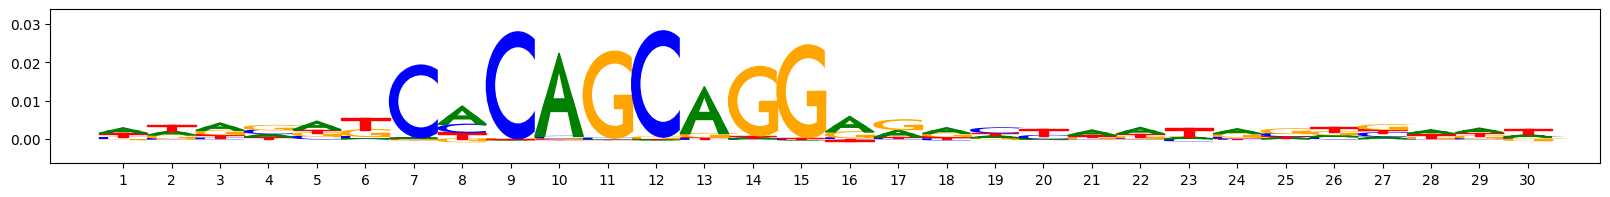

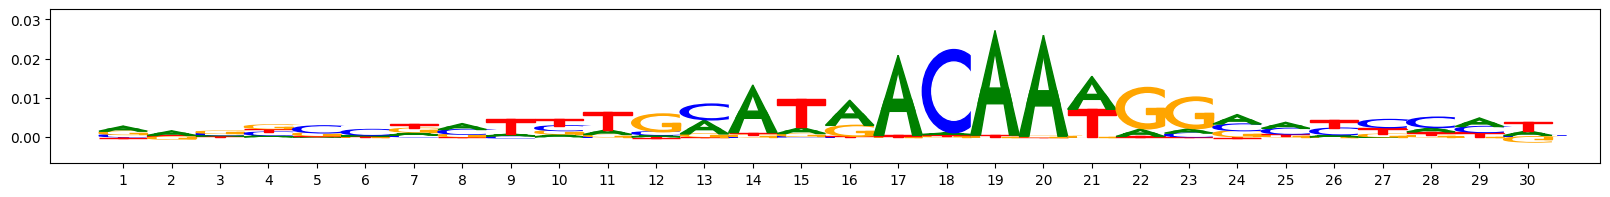

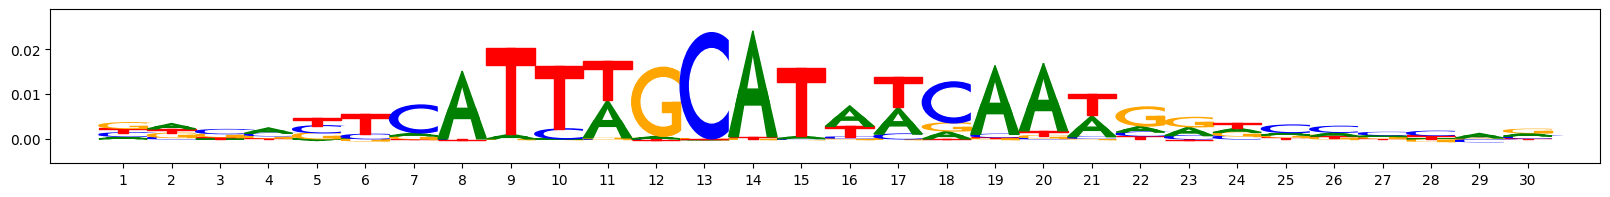

results 2


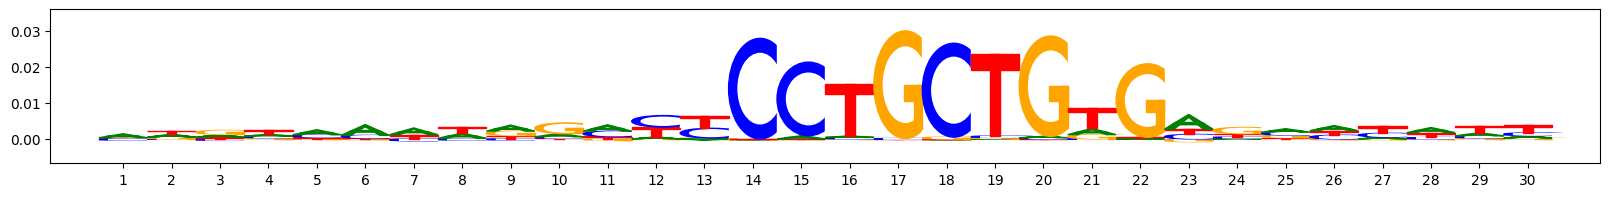

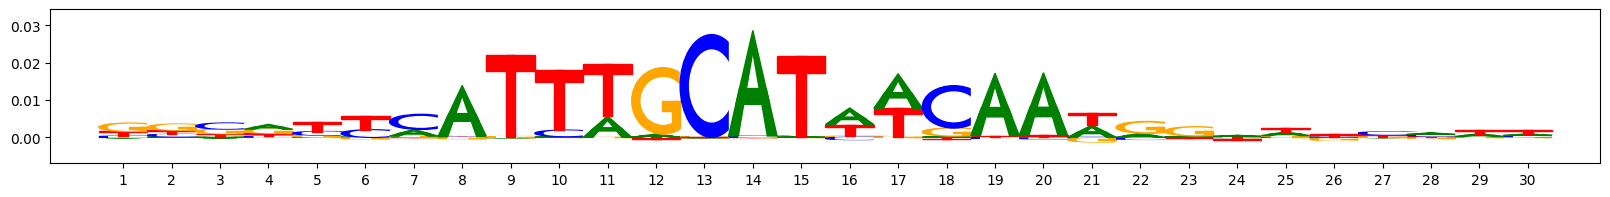

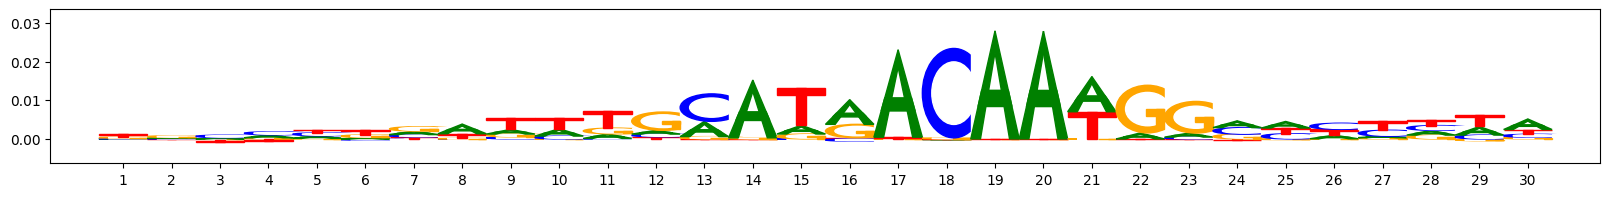

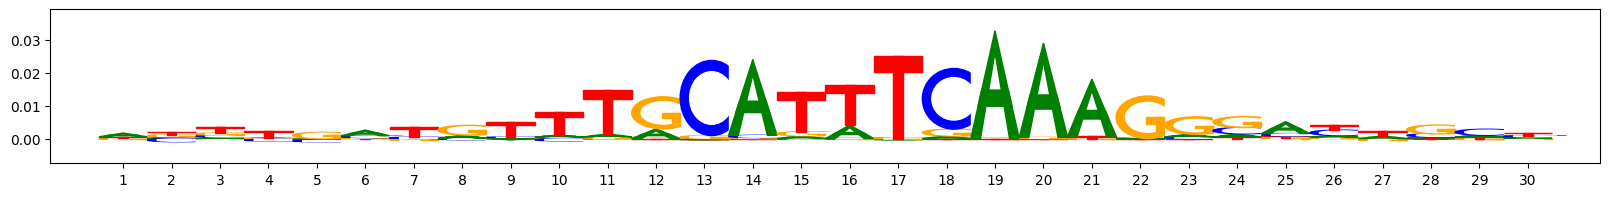

In [8]:
import vizsequence
import h5py as h5

%matplotlib inline

print("results 1")
fh = h5.File("modisco_results1.h5")
for akey in fh['pos_patterns'].keys():
  vizsequence.plot_weights(fh['pos_patterns'][akey]['contrib_scores'])
fh.close()

print("results 2")
fh = h5.File("modisco_results2.h5")
for akey in fh['pos_patterns'].keys():
  vizsequence.plot_weights(fh['pos_patterns'][akey]['contrib_scores'])
fh.close()

To merge patterns across different tfmodisco runs, we need to create a trackset object that stores scores for all the sequences across all the tfmodisco runs (with the caveat that we can filter out those sequences that have no seqlets originating from them). Access to scores for full sequences (as opposed to just scores for the seqlets) is needed because seqlets are often expanded during the merging process, meaning it is necessary to know what the scores look like in the region surrounding each seqlet. In order to do this, for each motif, a new set of seqlets needs to be created that references the `example_idx` within the unioned trackset (as opposed to referencing the `example_idx` in the trackset that was used during the tfmodisco run that the seqlet originated from), and a new motif object is constructed from these seqlets. Once this is done, the constructed motif objects can be subject to merging using the same process used during tfmodisco.

On file modisco_results1.h5
156 indices had seqlets out of 480
On file modisco_results2.h5
182 indices had seqlets out of 480
Patterns to be merged:
numseqlets: 76


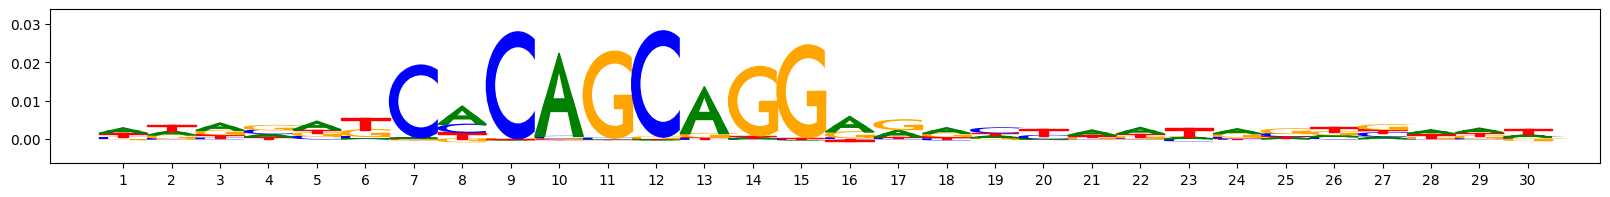

numseqlets: 51


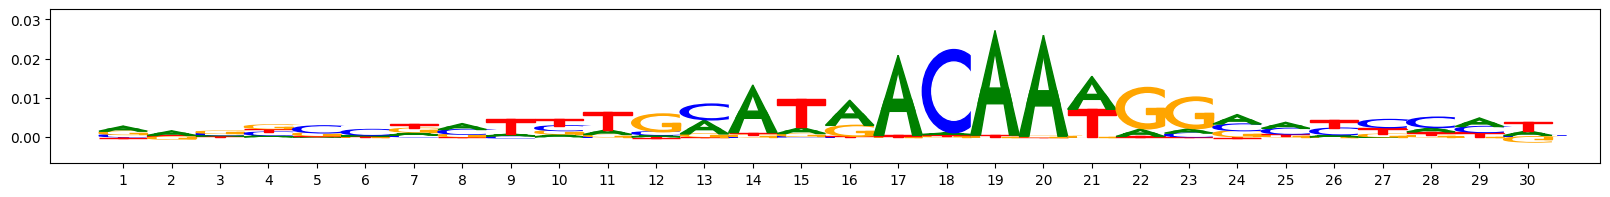

numseqlets: 39


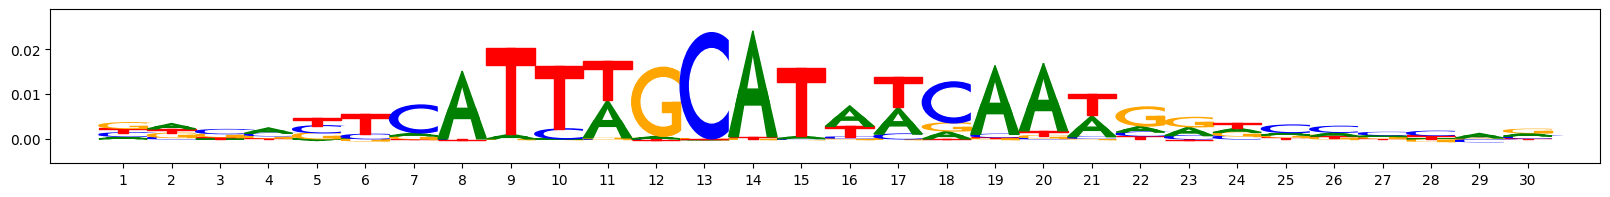

numseqlets: 87


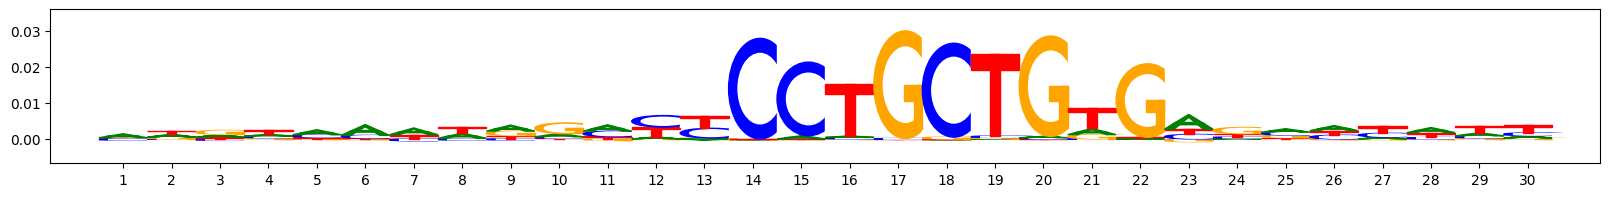

numseqlets: 43


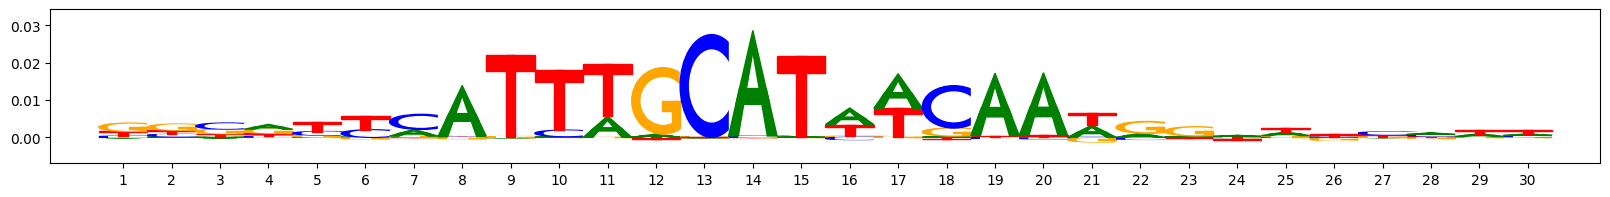

numseqlets: 43


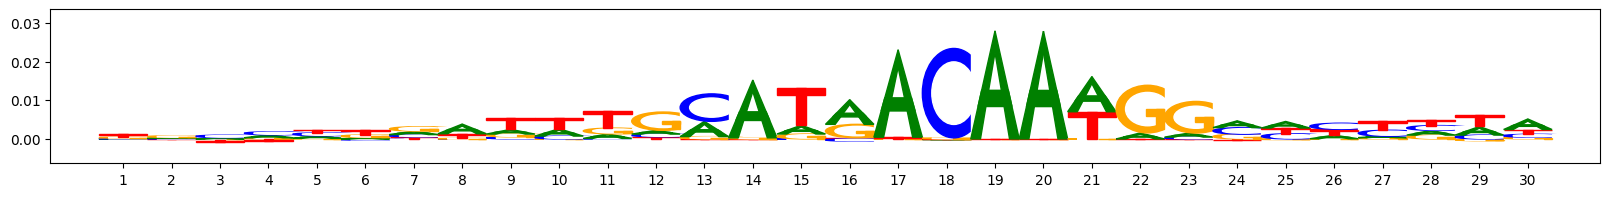

numseqlets: 26


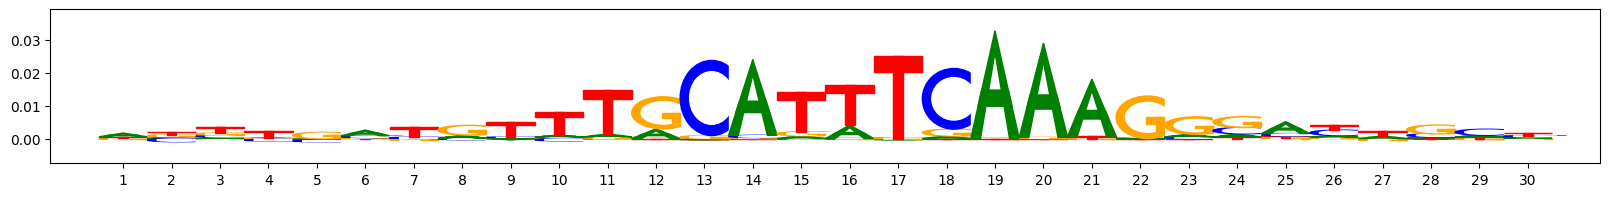

Merged patterns:
numseqlets: 163


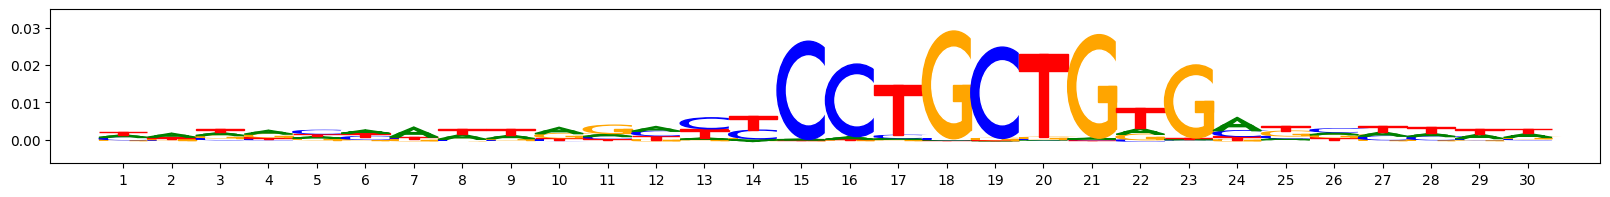

numseqlets: 94


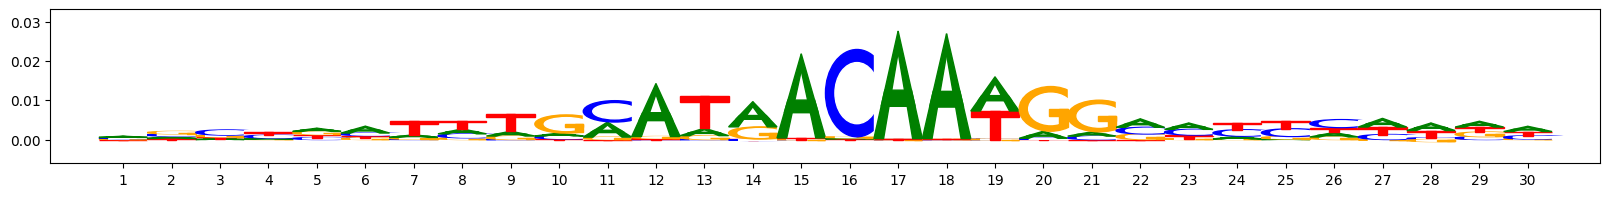

numseqlets: 82


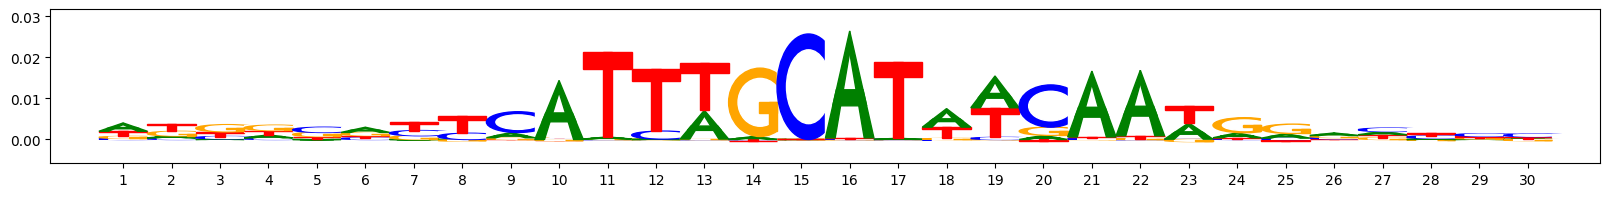

numseqlets: 26


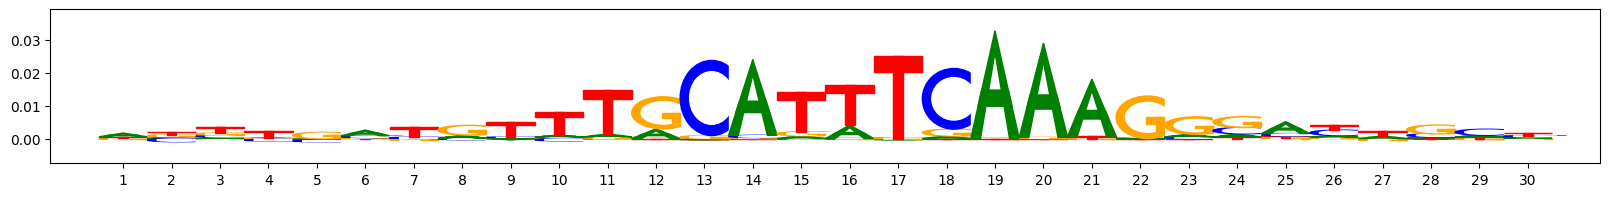

In [11]:
%matplotlib inline
import numpy as np
import h5py as h5
import modiscolite
from modiscolite.aggregator import SimilarPatternsCollapser
from modiscolite.core import TrackSet, Seqlet, SeqletSet
from matplotlib import pyplot as plt

#provide the list of modisco_results files to be merged, along with their
# corresponding one-hot encodings and hypothetical importance scores.
merge_list = [
    ("modisco_results1.h5", "ohe1.npz", "hypscores1.npz"),
    ("modisco_results2.h5", "ohe2.npz", "hypscores2.npz")
]

#hyperparameters for merging - these are set
# to the defaults in tfmodisco-lite
min_overlap = 0.7
prob_and_pertrack_sim_merge_thresholds = [(0.8,0.8), (0.5, 0.85), (0.2, 0.9)]
prob_and_pertrack_sim_dealbreaker_thresholds = [(0.4, 0.75), (0.2,0.8), (0.1, 0.85), (0.0,0.9)]
min_frac = 0.2 # also called frac_support_to_trim_to
min_num = 30 # also called min_num_to_trim_to
flank_to_add = 5 # also called initial_flank_to_add
window_size = 20 # also called trim_to_window_size
max_seqlets_subsample = 300 # also called merging_max_seqlets_subsample

pattern_group = 'pos_patterns' #pos_patterns or neg_patterns

union_onehot = []
union_hypscores = []
union_patterncoords = []

exampleidx_offset = 0 #incremented after each modisco results file
for (results_file, onehot_file, hypscores_file) in merge_list:

  print("On file "+results_file)

  results_fh = h5.File(results_file)
  onehot = (np.load(onehot_file)["arr_0"]).transpose(0,2,1)
  hypscores = (np.load(hypscores_file)["arr_0"]).transpose(0,2,1)

  allpattern_exampleidxs = []
  #first, iterate through the patterns and get all the example indices
  # (Note: "example_idx" refers to the index of the sequence that contained
  #  the seqlet)
  for pattern_name in results_fh[pattern_group].keys():
    seqlets_grp = results_fh[pattern_group][pattern_name]['seqlets']
    allpattern_exampleidxs.extend(np.array(seqlets_grp['example_idx']))
    
  #figure out the subset of indices that actually have seqlets, sort it.
  surviving_indices = sorted(list(set(allpattern_exampleidxs)))
  print(str(len(surviving_indices))+" indices had seqlets out of "
        +str(len(onehot)))
  #add the scores for the subset of sequences that have scores to the
  # 'union' list.
  for idx in surviving_indices:
    union_onehot.append(onehot[idx])
    union_hypscores.append(hypscores[idx])
  
  #create an index remapping based on the subset of surviving indices
  # (we will add exampleidx_offset later)
  idx_remapping = dict(zip(surviving_indices,
                           np.arange(len(surviving_indices))))
  
  #Now iterate through the patterns again and prep the seqlet coordinates,
  # remapping the example indices as needed.
  #We also add in exampleidx_offset to account for all the previous seqeuences
  # that have already been added to the 'union' lists
  for pattern_name in results_fh[pattern_group].keys():
    seqlets_grp = results_fh[pattern_group][pattern_name]['seqlets']
    pattern_exampleidxs = np.array(seqlets_grp['example_idx'])
    #remap the example idxs
    pattern_remapped_exampleidxs = np.array([
        (exampleidx_offset+idx_remapping[idx]) for idx in pattern_exampleidxs])
    pattern_start = np.array(seqlets_grp['start'])
    pattern_end = np.array(seqlets_grp['end'])
    pattern_isrevcomp = np.array(seqlets_grp['is_revcomp'])
    union_patterncoords.append((pattern_remapped_exampleidxs,
                                pattern_start, pattern_end, pattern_isrevcomp))
  #increment exampleidx_offset
  exampleidx_offset = (exampleidx_offset + len(surviving_indices))
  results_fh.close()

#create the trackset object
union_onehot = np.array(union_onehot)
union_hypscores = np.array(union_hypscores)
track_set = TrackSet(one_hot=union_onehot,
                     contrib_scores=union_onehot*union_hypscores,
                     hypothetical_contribs=union_hypscores)

#Create pattern objects using the new track_set and modified coordinates
print("Patterns to be merged:")
all_patterns = []
for (example_idxs, starts, ends, isrevcomps) in union_patterncoords:
  #tfmlite reuses the same object for representing seqlet
  # coordinates as well as seqlets
  seqlet_coords = [Seqlet(example_idx, start, end, isrevcomp) for
                   (example_idx, start, end, isrevcomp) in zip(
                   example_idxs, starts, ends, isrevcomps)]
  seqlets = track_set.create_seqlets(seqlet_coords)
  pattern = SeqletSet(seqlets) #SeqletSet in tfm lite = AggregatedSeqlet in tfm
  all_patterns.append(pattern)
  print("numseqlets:",len(pattern.seqlets))
  vizsequence.plot_weights(pattern.contrib_scores)

#bg_freq is used for identifying the region within a merged motif of
# highest information content and then expanding around that region.
bg_freq = np.mean(union_onehot, axis=(0, 1))

#Do the merging
merged_patterns, pattern_merge_hierarchy = SimilarPatternsCollapser(
    patterns=all_patterns,
    track_set=track_set,
    min_overlap=min_overlap,
    prob_and_pertrack_sim_merge_thresholds=prob_and_pertrack_sim_merge_thresholds,
	  prob_and_pertrack_sim_dealbreaker_thresholds=prob_and_pertrack_sim_dealbreaker_thresholds,
	  min_frac=min_frac,
    min_num=min_num,
    flank_to_add=flank_to_add,
    window_size=window_size,
    bg_freq=bg_freq,
	  max_seqlets_subsample=max_seqlets_subsample)

print("Merged patterns:")

for pattern in merged_patterns:
  print("numseqlets:",len(pattern.seqlets))
  vizsequence.plot_weights(pattern.contrib_scores)